<a href="https://colab.research.google.com/github/DelisaFebriana/PROJECT_DEP-BIN/blob/main/PROJECT_BIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESI

# **Import**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_excel('Superstore.xls')

In [ ]:
# Menentukan bagian (X) dan bagian (y)
X = df['Quantity'].values.reshape(-1, 1)
y = df['Sales'].values

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data latih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi menggunakan data uji
y_pred = model.predict(X_test)

## **Evaluasi**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 567865.6723422331
R-squared: 0.038655024251615044


## **PLOT**

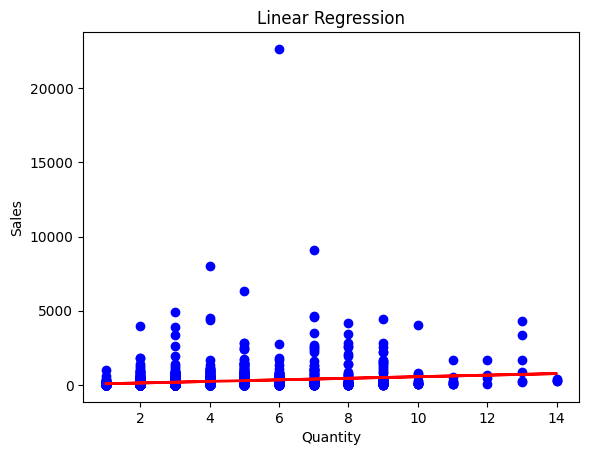

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.title('Linear Regression')
plt.show()

# K-MEANS

In [ ]:
# Menentukan bagian (X)
X = df[['Sales', 'Profit']].values

# Normalisasi
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Membuat model K-Means dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)

# Clustering
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## **PLOT**

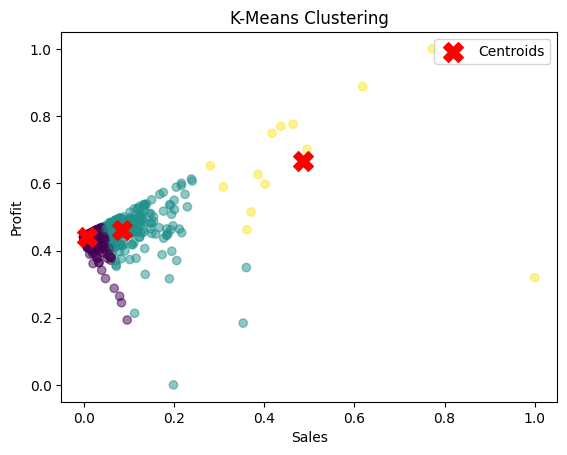

In [ ]:
# 7. Visualisasikan hasil clustering dengan plot, termasuk pusat cluster
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Jumlah Pelanggan Unik Berdasarkan Negara Bagian


In [ ]:
# 1. Impor library yang diperlukan
import pandas as pd

# 2. Baca dataset ke dalam DataFrame
df = pd.read_excel('Superstore.xls')

# 3. Ubah kolom 'Order Date' ke tipe datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Tambahkan kolom berdasarkan tahun
df['year'] = df['Order Date'].dt.year

# Tambahkan kolom berdasarkan bulan
df['month'] = df['Order Date'].dt.month

# Tambahkan kolom berdasarkan nama hari
df['day_name'] = df['Order Date'].dt.day_name()

# Ubah nama kolom 'State' menjadi 'address_state' dan 'City' menjadi 'address_city'
df.rename(columns={'State': 'address_state', 'City': 'address_city'}, inplace=True)

# Kelompokkan berdasarkan 'address_state' dan hitung jumlah pelanggan unik
state_customer_count = df.groupby('address_state')['Customer ID'].nunique().reset_index()

# Urutkan berdasarkan jumlah pelanggan unik
state_customer_count = state_customer_count.sort_values(by='Customer ID', ascending=False)

# Tampilkan hasil pengelompokan yang telah diurutkan
print(state_customer_count)


           address_state  Customer ID
3             California          577
30              New York          415
41                 Texas          370
36          Pennsylvania          257
11              Illinois          237
45            Washington          224
33                  Ohio          202
8                Florida          181
31        North Carolina          122
44              Virginia          107
20              Michigan          106
1                Arizona          100
40             Tennessee           84
9                Georgia           83
4               Colorado           75
12               Indiana           70
19         Massachusetts           62
28            New Jersey           61
15              Kentucky           58
47             Wisconsin           52
35                Oregon           51
18              Maryland           45
5            Connecticut           43
6               Delaware           43
21             Minnesota           42
0           

# Tren Penjualan Tahunan dan Bulanan

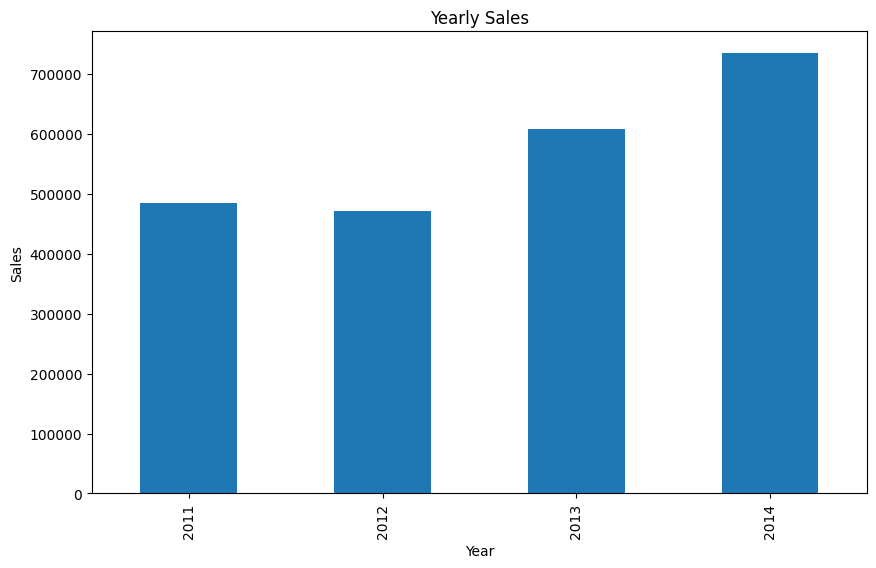

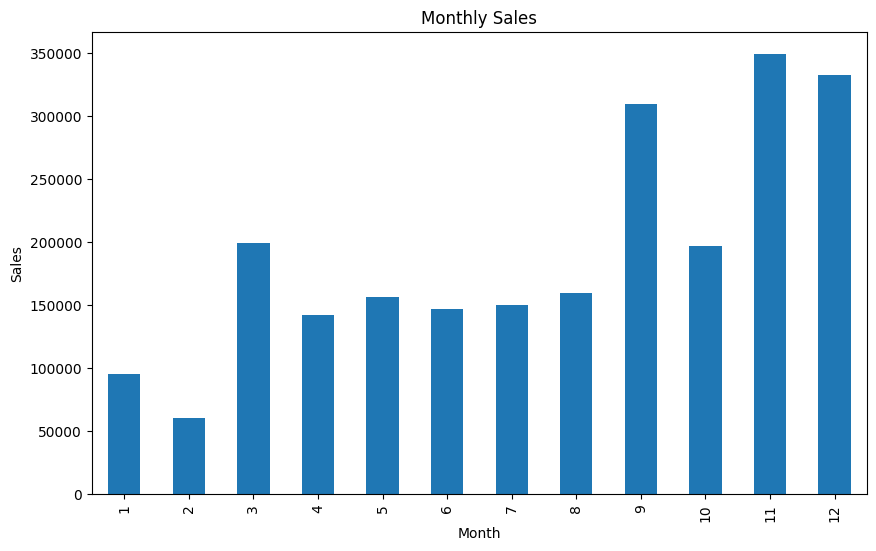

In [ ]:
# 1. Impor library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt

# 2. Baca dataset ke dalam DataFrame
df = pd.read_excel('Superstore.xls')

# 3. Ubah kolom 'Order Date' ke tipe datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# 4. Tambahkan kolom berdasarkan tahun dan bulan
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# 5. Agregasi data penjualan berdasarkan tahun dan bulan
yearly_sales = df.groupby('Year')['Sales'].sum()
monthly_sales = df.groupby('Month')['Sales'].sum()

# 6. Visualisasikan tren penjualan tahunan
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

# 7. Visualisasikan tren penjualan bulanan
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()
